### FINAL PROJECT - DATA MINING (CS505)
### Fake News Detection

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import itertools
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline

In [2]:
#Reading the fake news and true news datasets
fd_fake_data=pd.read_csv('Fake.csv')
fd_true_data=pd.read_csv('True.csv')

In [3]:
#printing the first six elements of fake news dataset
fd_fake_data.head(6)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"


In [4]:
#printing the last five elements of fake news dataset
fd_fake_data.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [5]:
#printing the first six elements of true news dataset
fd_true_data.head(6)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"


In [6]:
#printing the last five elements of true news dataset
fd_true_data.tail()

,title,text,subject,date
21333,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21334,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21335,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21336,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21337,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [7]:
#Inserting a column called "class" for fake and real news dataset to categories fake and true news.
fd_fake_data["class"] = 0
fd_true_data["class"] = 1

In [8]:
#finding the shape of data
fd_fake_data.shape, fd_true_data.shape

((23481, 5), (21338, 5))

In [10]:
#Inserting a column called "class" for fake and real news dataset to categories fake and true news
fd_fake_manual_testing = fd_fake_data.tail(10)
for i in range(23480,23470,-1):
    fd_fake_data.drop([i], axis = 0, inplace = True)
fd_true_manual_testing = fd_true_data.tail(10)
for i in range(21336,21226,-1):
    fd_true_data.drop([i], axis = 0, inplace = True)

# Merging the manual testing dataframe in single dataset and save it in a csv file

In [11]:
fd_fake_manual_testing["class"] = 0
fd_true_manual_testing["class"] = 1
#you will get some warnings leave those

C:\Users\Sivaji Marripudi\AppData\Local\Temp\ipykernel_32668\626504640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd_fake_manual_testing["class"] = 0
C:\Users\Sivaji Marripudi\AppData\Local\Temp\ipykernel_32668\626504640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd_true_manual_testing["class"] = 1


In [13]:
fd_manual_testing = pd.concat([fd_fake_manual_testing,fd_true_manual_testing], axis = 0)
fd_manual_testing.to_csv("manual_testing.csv")
fd_margin = pd.concat([fd_fake_data, fd_true_data], axis =0 )

In [14]:
fd_margin.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [15]:
#"Date","title" and subject columns are not required so I am removing them
fd = fd_margin.drop(["title", "subject","date"], axis = 1)
fd.isnull().sum()

text     0
class    0
dtype: int64

In [16]:
#Randomly shuffling the dataframe
fd= fd.sample(frac = 1)
fd.head()

,text,class
15938,JOHANNESBURG (Reuters) - South African Preside...,1
13442,TUNIS (Reuters) - The bodies of 36 men found n...,1
16261,SEOUL (Reuters) - U.S. Defense Secretary Jim M...,1
12741,The disclosure that Clinton Chair John Podest...,0
7612,(Reuters) - U.S. Republican presidential candi...,1


In [17]:
fd.reset_index(inplace = True)
fd.drop(["index"], axis = 1, inplace = True)
fd.columns

Index(['text', 'class'], dtype='object')

# Creating a function for converting the text in lowercase, remove the extra space, special chr., ulr and links.

In [18]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [19]:
fd["text"] = fd["text"].apply(wordopt)

In [21]:
#Defining dependent and independent variable as x and y
x = fd["text"]
y = fd["class"]

# Splitting the dataset into training set and testing set

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [23]:
#Convert text to vectors
vec = TfidfVectorizer()
xv_train = vec.fit_transform(x_train)
xv_test = vec.transform(x_test)

# Prediction Using Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
K = LogisticRegression()
K.fit(xv_train,y_train)

LogisticRegression()

In [25]:
pred_k=K.predict(xv_test)

In [26]:
score=K.score(xv_test, y_test)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 98.57%


In [27]:
print(classification_report(y_test, pred_k))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7087
           1       0.98      0.99      0.98      6323

    accuracy                           0.99     13410
   macro avg       0.99      0.99      0.99     13410
weighted avg       0.99      0.99      0.99     13410



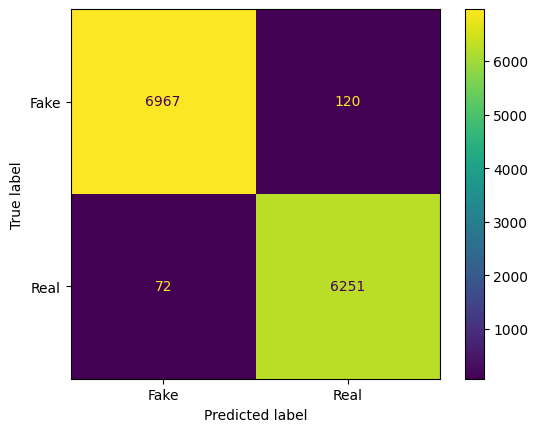

In [28]:
#Plotting the result using confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=pred_k, labels=K.classes_)
conf_disp=ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Fake','Real'])
conf_disp.plot()

# Prediction Using Decesion Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
dec_tree_class = DecisionTreeClassifier()
dec_tree_class.fit(xv_train, y_train)

DecisionTreeClassifier()

In [30]:
pred_dec_tree_class = dec_tree_class.predict(xv_test)

In [31]:
score = dec_tree_class.score(xv_test, y_test)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.58%


In [32]:
print(classification_report(y_test, pred_dec_tree_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7087
           1       1.00      1.00      1.00      6323

    accuracy                           1.00     13410
   macro avg       1.00      1.00      1.00     13410
weighted avg       1.00      1.00      1.00     13410



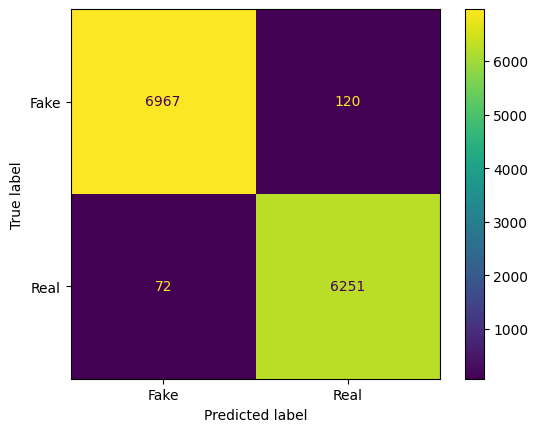

In [34]:
#Plotting the result using confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred_k, labels=dec_tree_class.classes_)
conf_disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Fake','Real'])
conf_disp.plot()

# Testing With Manual Entry

In [37]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vec.transform(new_x_test)
    pred_k = K.predict(new_xv_test)
    pred_z = dec_tree_class.predict(new_xv_test)
    return print("\n\nLR Prediction: {} \nDT Prediction: {}".format(output_lable(pred_k[0]),output_lable(pred_z[0])))

In [38]:
#Here I am entering some random data from dataset
news = str(input())
manual_testing(news)

 zhhhzhsahsasahsh




LR Prediction: Fake News 
DT Prediction: Fake News


In [40]:
#Here I am entering some random data from dataset
news_one = str(input())
manual_testing(news_one)

 Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev



LR Prediction: Fake News 
DT Prediction: Fake News


In [42]:
#Here I am entering some random data from dataset
news_two = str(input())
manual_testing(news_two)

 WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat



LR Prediction: Real News 
DT Prediction: Real News
